In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

In [34]:
# inputs the file with headline records
# outputs training, evaluation and test sets with 0.7, 0.15 and 0.15 ratio as np.ndarray and corresponding column names(words)
def load_data(real, fake):

  with open(real, 'r') as r_file:
    real_data = r_file.readlines()

  with open(fake, 'r') as f_file:
    fake_data = f_file.readlines()

  data = real_data + fake_data
  cv = CountVectorizer()
  X = cv.fit_transform(data)
  # Labeling fake as zero and real as 1
  labels = np.concatenate((np.zeros(len(fake_data), dtype=int), np.ones(len(real_data), dtype=int)))
  labels = labels.reshape(-1, 1)

  X = np.hstack((X.toarray(), labels))
  X_train, X_test = train_test_split(X, test_size = 0.3, shuffle=True)
  X_eval, X_test = train_test_split(X_test, test_size = 0.5, shuffle = True)


  return cv.get_feature_names_out(), X_train, X_eval, X_test

In [45]:
def select_model(X_train, y_train, X_eval, y_eval):

  depth_accuracy = pd.DataFrame(columns = ['Depth', 'Accuracy'])

  for i in range(3,11):
    tree = DecisionTreeClassifier(max_depth = i, criterion = 'entropy', random_state = 42)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_eval)

    accuracy = accuracy_score(y_eval, y_pred)

    print("depth ", i, '\n', 'accuracy ', accuracy)

    # depth_accuracy.loc[i-3] = [i, accuracy]
    depth_accuracy.loc[len(depth_accuracy)] = [i, accuracy]

  return depth_accuracy


In [67]:
def highest_on_test_accuracy(df, X_train, y_train, X_test, y_test):
  i = df['Accuracy'].idxmax()
  tree = DecisionTreeClassifier(max_depth = int(depth_accuracy.loc[i, 'Depth']),
                                criterion = 'entropy',
                                random_state = 42)
  tree.fit(X_test, y_test)
  y_pred = tree.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print('Accuracy score ', accuracy, '\n',
        'Best depth: ', int(depth_accuracy.loc[i, 'Depth']))

In [46]:
feature_names, training, eval, test = load_data('real.txt', 'fake.txt')

depth_accuracy = select_model(training[:, :-1], training[:, -1], eval[:, :-1], eval[:, -1])
depth_accuracy

depth  3 
 accuracy  0.6448979591836734
depth  4 
 accuracy  0.6408163265306123
depth  5 
 accuracy  0.6408163265306123
depth  6 
 accuracy  0.636734693877551
depth  7 
 accuracy  0.6387755102040816
depth  8 
 accuracy  0.636734693877551
depth  9 
 accuracy  0.6387755102040816
depth  10 
 accuracy  0.6428571428571429


,Depth,Accuracy
0,3.0,0.644898
1,4.0,0.640816
2,5.0,0.640816
3,6.0,0.636735
4,7.0,0.638776
5,8.0,0.636735
6,9.0,0.638776
7,10.0,0.642857


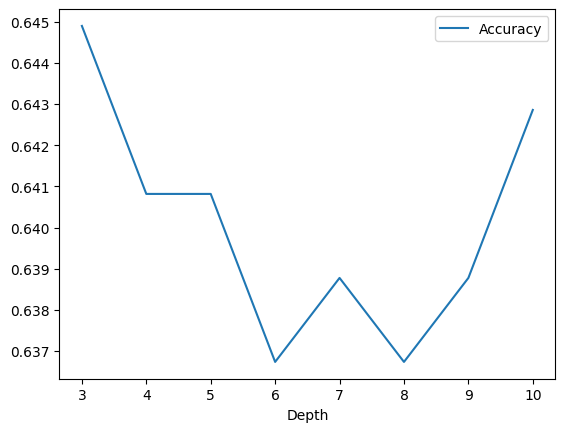

In [69]:
depth_accuracy.plot(x='Depth', y='Accuracy');

In [68]:
highest_on_test_accuracy(depth_accuracy, training[:, :-1], training[:, -1],
                         test[:, :-1], test[:, -1])

Accuracy score  0.6408163265306123 
 Best depth:  3


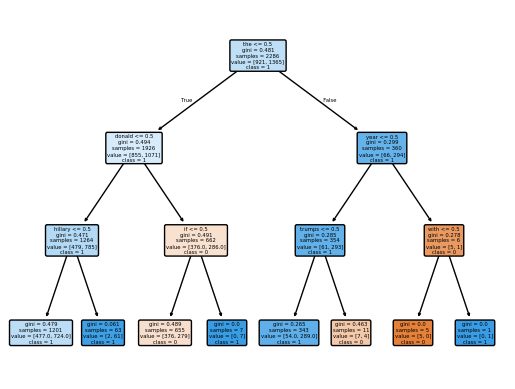

In [73]:
tree = DecisionTreeClassifier(max_depth = 3)
tree.fit(training[:, :-1], training[:, -1])


plot_tree(
    tree,
    filled=True,
    feature_names=feature_names,
    class_names=list(map(str, tree.classes_)),
    rounded=True
);
